### Model Training

### 1.1 Import Data and Required Pacages
- importing pandas ,Numpy,matplotlib,seaborn and Warning library

In [1]:
## Basic import 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
## Modeling 
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [1]:
#!pip install catboost

In [2]:
#!pip install xgboost

### import the csv Data as Pandas DataFrame

In [4]:
df=pd.read_csv('stud.csv')

In [5]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### preparing X and y

In [6]:

X = df.drop(columns=['math_score'],axis=1)

In [7]:
X.shape

(1000, 7)

In [8]:
X.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88


In [9]:
print('Categories in gender variables ',end=' ')
print(df['gender'].unique())
print('Categories in race_ethincity variales: ',end=' ')
print(df['race_ethnicity'].unique())
print('Categories in parental_level_education variable :  ',end=' ')
print(df['parental_level_of_education'].unique())
print('Categories in lunch variable:  ',end=' ')
print(df['lunch'].unique())
print('Categories in test_preparation_course',end=' ')
print(df['test_preparation_course'].unique())

Categories in gender variables  ['female' 'male']
Categories in race_ethincity variales:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_education variable :   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable:   ['standard' 'free/reduced']
Categories in test_preparation_course ['none' 'completed']


In [10]:
y =df['math_score']

In [11]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [12]:
## create column Transformer with 3 types of transfer
num_features=X.select_dtypes(exclude='O').columns
cat_features=X.select_dtypes(include='O').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer =StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor=ColumnTransformer([('OneHotEncoder',oh_transformer,cat_features),
                               ('StandarScaler',numeric_transformer,num_features)])


In [13]:
X=preprocessor.fit_transform(X)

In [14]:
X.shape

(1000, 19)

#### separate dataset into train and test

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

### Create an Evaluate Function to give all metrics after model training

In [16]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse =np.sqrt(mse)
    r2_square=r2_score(true,predicted)
    return mae,mse,rmse,r2_square

In [41]:


model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model =list(models.values())[i]
    model.fit(X_train,y_train) # train model
     
    #make predictions
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    # Evaluate train and Test dataset

    model_train_mae , model_train_mse, model_train_rmse , model_train_r2=evaluate_model(y_train,y_train_pred)
    model_test_mae, model_test_mse,model_test_rmse,model_test_r2 = evaluate_model(y_test,y_test_pred)
    model_list.append(list(models.keys())[i])
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Square Error: {:.4f}".format(model_train_rmse))
    print('-mean Absolute Error: {:.4f}'.format(model_train_mae))
    print('-r2 score: {:.4f}'.format(model_train_r2))

    print('__ ___  _ __ _ _ _ _ _ _ _ _ _ _ __   _ _ _ _ _ _ _ _ _ _ _ _ _ _ __')

    print('model performance for test set')
    print('-Root mean square Error: {:.4f}'.format(model_test_rmse))
    print('-Mean Absolute Error: {:.4f}'.format(model_test_mae))
    print('-R score: {:.4f}'.format(model_test_r2))
    r2_list.append(model_test_r2)
    print('='*35)
    print('\n')

Linear_Regression
Model performance for Training set
- Root Mean Square Error: 5.3231
-mean Absolute Error: 4.2667
-r2 score: 0.8743
__ ___  _ __ _ _ _ _ _ _ _ _ _ _ __   _ _ _ _ _ _ _ _ _ _ _ _ _ _ __
model performance for test set
-Root mean square Error: 5.3940
-Mean Absolute Error: 4.2148
-R score: 0.8804


Lasso
Model performance for Training set
- Root Mean Square Error: 6.5938
-mean Absolute Error: 5.2063
-r2 score: 0.8071
__ ___  _ __ _ _ _ _ _ _ _ _ _ _ __   _ _ _ _ _ _ _ _ _ _ _ _ _ _ __
model performance for test set
-Root mean square Error: 6.5197
-Mean Absolute Error: 5.1579
-R score: 0.8253


Ridge
Model performance for Training set
- Root Mean Square Error: 5.3233
-mean Absolute Error: 4.2650
-r2 score: 0.8743
__ ___  _ __ _ _ _ _ _ _ _ _ _ _ __   _ _ _ _ _ _ _ _ _ _ _ _ _ _ __
model performance for test set
-Root mean square Error: 5.3904
-Mean Absolute Error: 4.2111
-R score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Square Error: 5.

### Result

In [22]:
pd.DataFrame(list(zip(model_list,r2_list)),columns =['model name','r2_score']).sort_values(by=['r2_score'],ascending=False)

,model name,r2_score
2,Lasso,0.880593
0,Linear_Regression,0.880433
7,K-Neighbors Regressor,0.851632
5,Ridge,0.849923
8,Decision Tree,0.849005
6,K-Neighbors Regressor,0.827797
1,Linear_Regression,0.825320
3,Lasso,0.783722
4,Ridge,0.742046


### Linear Regression

In [24]:
lin_model = LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train,y_train)
y_pred =lin_model.predict(X_test)
score =r2_score(y_test,y_pred)*100
print('Accuracy of the modelis %.2f'%score)

Accuracy of the modelis 88.04


### Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

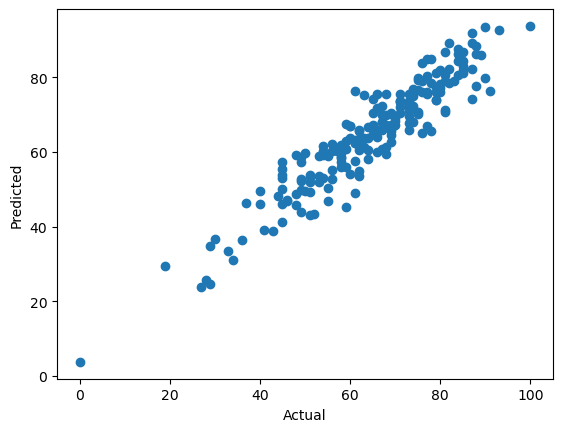

In [26]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

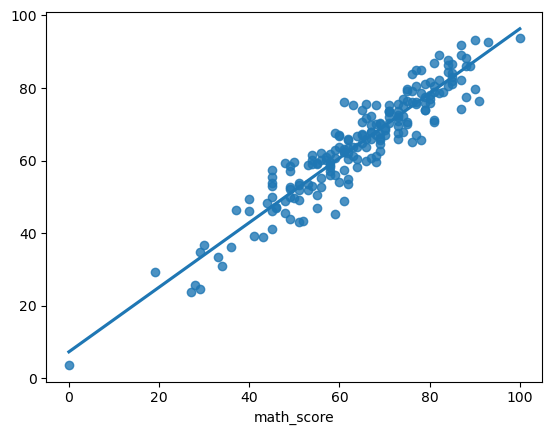

In [37]:
sns.regplot(x=y_test,y=y_pred,ci=None);

### Difference between Actual and Predicted Values

In [39]:
pred_diff =pd.DataFrame({'Actual value':y_test,'Predicted Value':y_pred,'Difference ': y_test-y_pred})

In [40]:
pred_diff

,Actual value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
